<a href="https://www.kaggle.com/code/xshaimaa/wine-quality-analysis-and-eda?scriptVersionId=93689372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Dataset Description
There are two datasets that provide information on samples of red and white variants of the Portuguese "Vinho Verde" wine. Each sample of wine was rated for quality by wine experts and examined with physicochemical tests. Due to privacy and logistic issues, only data on these physicochemical properties and quality ratings are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). data is originaly from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

## Columns Description
1. `fixed acidity`: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. `volatile acidity`: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. `citric acid`: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. `residual sugar`: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. `chlorides`: the amount of salt in the wine
6. `free sulfur dioxide`: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. `total sulfur dioxide`: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. `density`: the density of water is close to that of water depending on the percent alcohol and sugar content
9. `pH`: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. `sulphates`: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. `alcohol`: the percent alcohol content of the wine
12. `quality`: (score between 0 and 10)

## EDA Questions
- Q1: What chemical characteristics are most important in predicting the quality of wine?
- Q2: Is a certain type of wine (red or white) associated with higher quality?
- Q3: Do wines with higher alcoholic content receive better ratings?
- Q4: Do sweeter wines (more residual sugar) receive better ratings?
- Q5: What level of acidity (pH) is associated with the highest quality?

## Enironment Set-up

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Public Functions
here, we'd put all of the public functions to be used in this notebook

In [28]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles
   
    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name 
        (labels) list - list of labels from min to max
    
    Returns:
        (df)     df   - dataframe with the categorized col
    """
    
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

___
## Data Wrangling
here, we'd load our data from the CSV file, and dive deeper into it to check for any required cleaning steps.

In [29]:
# loading red wine data and viewing head
df_red = pd.read_csv('/Users/bhuvanms/Documents/Bhuvanmysoresridhar/Wine-Quality-dataset/wineQualityReds.csv')
df_red.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
# loading white wine data and viewing head
df_white = pd.read_csv('/Users/bhuvanms/Documents/Bhuvanmysoresridhar/Wine-Quality-dataset/wineQualityWhites.csv')
df_white.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [32]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed.acidity         4898 non-null   float64
 2   volatile.acidity      4898 non-null   float64
 3   citric.acid           4898 non-null   float64
 4   residual.sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free.sulfur.dioxide   4898 non-null   float64
 7   total.sulfur.dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [33]:
df_red.nunique()

Unnamed: 0              1599
fixed.acidity             96
volatile.acidity         143
citric.acid               80
residual.sugar            91
chlorides                153
free.sulfur.dioxide       60
total.sulfur.dioxide     144
density                  436
pH                        89
sulphates                 96
alcohol                   65
quality                    6
dtype: int64

In [34]:
df_white.nunique()

Unnamed: 0              4898
fixed.acidity             68
volatile.acidity         125
citric.acid               87
residual.sugar           310
chlorides                160
free.sulfur.dioxide      132
total.sulfur.dioxide     251
density                  890
pH                       103
sulphates                 79
alcohol                  103
quality                    7
dtype: int64

In [35]:
print(df_red.duplicated().sum(), df_white.duplicated().sum())

0 0


___
### Exploration Summery
- red dataframe consists of 1599 records and 13 attributes, while white dataframe consists of 4898 records and the same attributes.
- both data frames has no NaNs nor duplicated values.
- we woul combine the two dataframes and append a new categorical column to indecate the wine color for better analysis.
- columns data types are consistant.
- `Unnamed: 0` column would be dropped.

___
## Data Cleaning
here, we'd perform some process into our dataframe in order to make the analysis process easier.

**Appending new color column and merging dataframes**

In [36]:
# create color array for red dataframe
color_red = np.repeat('red', df_red.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', df_white.shape[0])

In [37]:
# appending new column and confirming changes
df_red['color'] = color_red
df_red.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
# appending new column and confirming changes
df_white['color'] = color_white
df_white.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Now that we have two dataframes with extra column indicating their color, let's move into appending them into a new dataframe and save it.

In [39]:
# append dataframes and confirm changes
wine_df = pd.concat([df_white, df_red], axis = 0, ignore_index = True)
wine_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [40]:
wine_df.duplicated().sum()

0

In [41]:
# casting color column and confirming changes
wine_df['color'] = wine_df['color'].astype('category')
wine_df['color'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False, categories_dtype=object)

___
**Dropping `Unnamed: 0` column**

In [42]:
# dropping column and confirming changes
wine_df.drop('Unnamed: 0', axis = 1, inplace = True)
wine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [43]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed.acidity         6497 non-null   float64 
 1   volatile.acidity      6497 non-null   float64 
 2   citric.acid           6497 non-null   float64 
 3   residual.sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free.sulfur.dioxide   6497 non-null   float64 
 6   total.sulfur.dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  color                 6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


In [44]:
wine_df.to_csv('wine_full.csv', index = False)

- Now that our data is tidy and clean, we are left with 13 columns and 6497 rows for our data to begin the analysis with. a new csv file containing our full data is saved in `wine_full.csv`.


___
## Data Visualization and EDA
In this section, we'd use summery statistics along with libraries like `matplotlib` and `seaborn` to gain informative insights about our data and answer the EDA questions.


In [45]:
# setting up seaborn configurations
sns.set_style('whitegrid') 

### Q1: What chemical characteristics are most important in predicting the quality of wine?

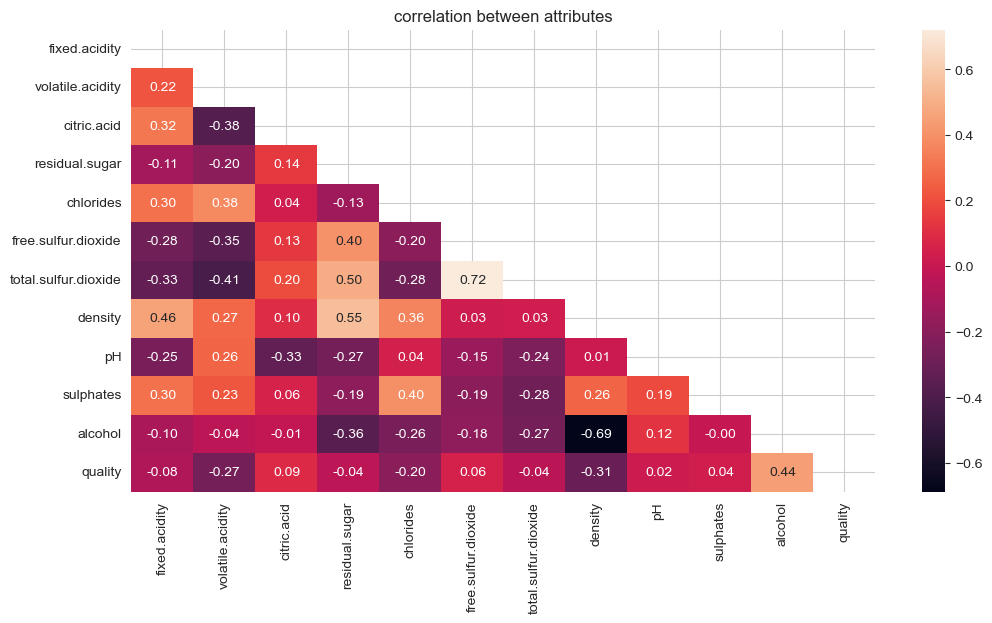

In [46]:
# plotting correlation heatmap
plt.figure(figsize=(12,6))
corr = corr = wine_df.select_dtypes(include=[np.number]).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

From the above correlation plot, we can easily see if certain attributes are correlated more strongly to wine `quality` than some others.

- strong correlated attributes:
  - `alcohol` and `quality`, and it's clear that this is the highest relation that affects wine quality.


- weak correlated attributes (do not depend on each other):
  - `density` and `alcohol`.
  - `free.sulphur.dioxide` and `citric.acid` has almost no correlation with `quality`


- `density` has strong positive correlation with `residual.sugar` and strong negative correlation with `alcohol`.

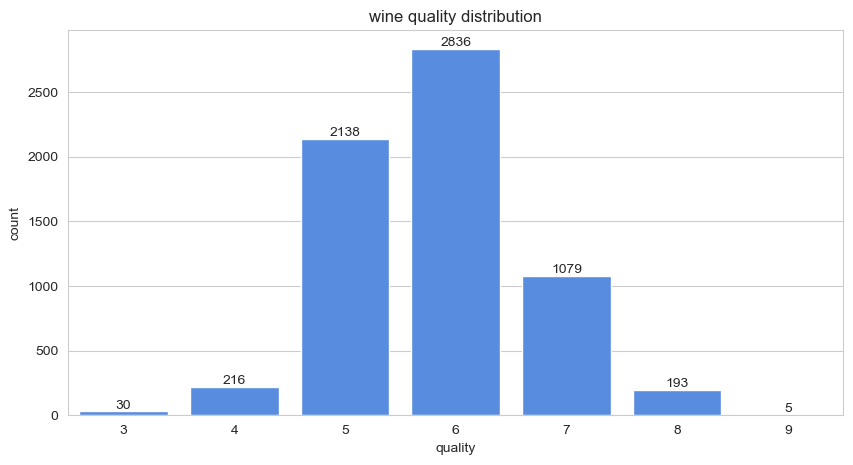

In [47]:
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", data = wine_df, color = '#4287f5')
plt.title("wine quality distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

- the vast majority of the wine has a quality of 6, while less numbers has a quality of 9. 

___
### Q2: Is a certain type of wine (red or white) associated with higher quality?

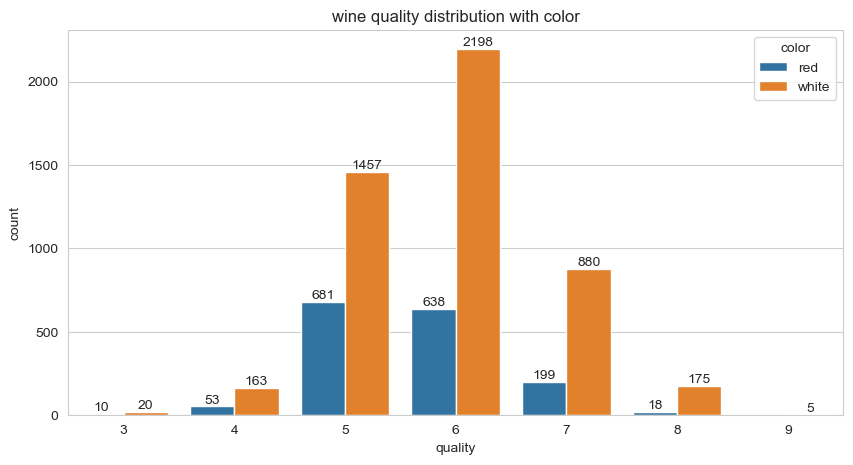

In [48]:
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", hue = "color", data = wine_df)
plt.title("wine quality distribution with color")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

- there is noticable deviation between white and red wine counts.
- most of the white wine has a `quality` of 6, while most of the red wine has a `quality` of 5.

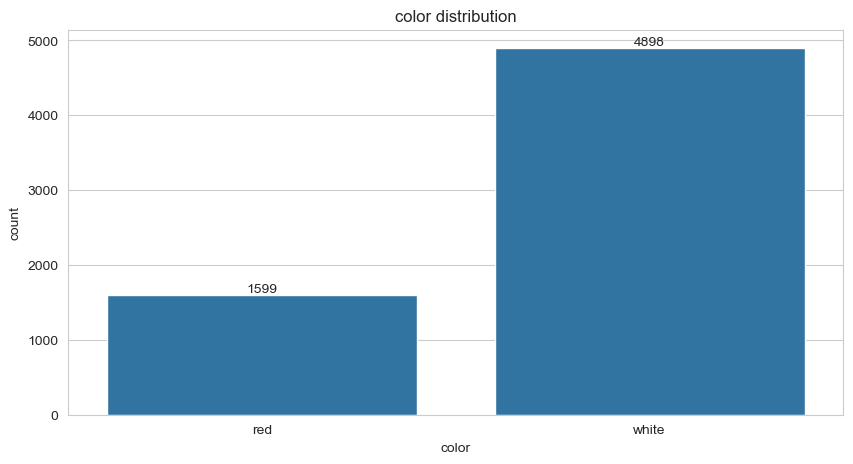

In [49]:
# plotting wine color dist.
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "color", data = wine_df)
plt.title("color distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

- we can notice that white wine formes the vast majority of our dataset as it appears in more than 75% of the times.

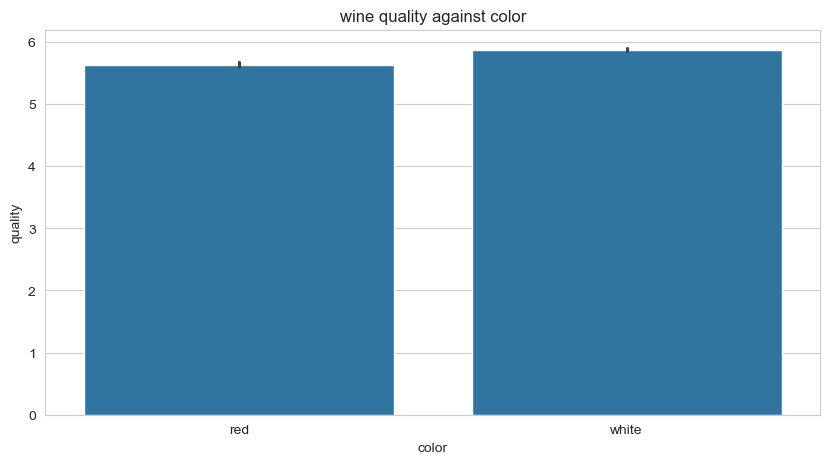

In [50]:
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x = "color", y = "quality", data = wine_df)
plt.title("wine quality against color")
plt.show()

In [51]:
wine_df.groupby('color')['quality'].mean()

/var/folders/hh/1zlly3jj27j032_fwpr2wstm0000gn/T/ipykernel_247/1535642038.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('color')['quality'].mean()


color
red      5.636023
white    5.877909
Name: quality, dtype: float64

- the mean quality of red and white wine are versy close.
- white wine has the best mean quality higher than red wine.

___
### Q3: Do wines with higher alcoholic content receive better ratings?

In [52]:
# viewing stats about alcoholic content
wine_df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

- we have the highst alcohol content at 14.9.
- most of the wine has alcoholic content around 10.4.

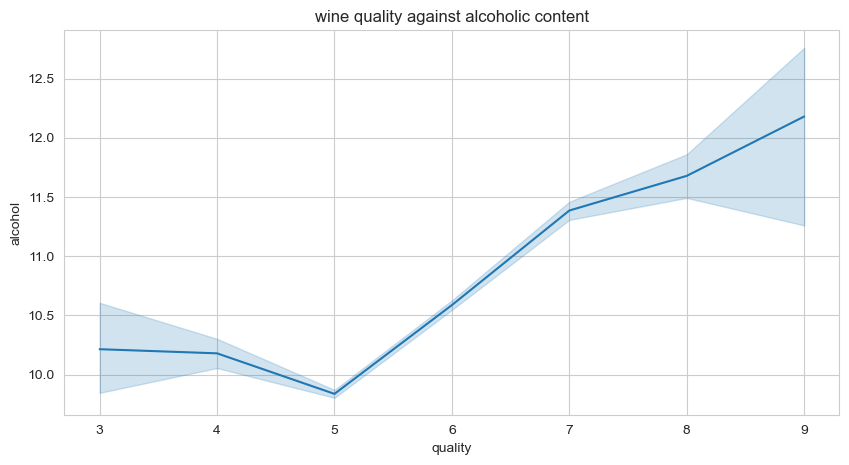

In [53]:
# plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "quality", y = "alcohol", data = wine_df)
plt.title("wine quality against alcoholic content")
plt.show()

- most of our dataset that has a quality of 6 appears to have relatively low acoholic content, but it's still above the mean.
- high alcoholic content only appears in our dataset with high quality wine.

___
### Q4: Do sweeter wines (more residual sugar) receive better ratings?

In [54]:
wine_df['residual.sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual.sugar, dtype: float64

/var/folders/hh/1zlly3jj27j032_fwpr2wstm0000gn/T/ipykernel_247/3659265657.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "quality", y = "residual.sugar", data = wine_df,


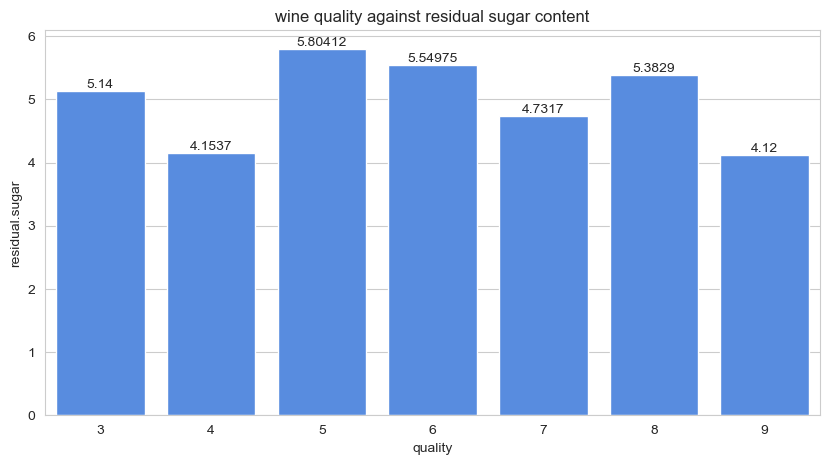

In [55]:
# plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x = "quality", y = "residual.sugar", data = wine_df, 
                 color = '#4287f5', ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("wine quality against residual sugar content")
plt.show()

- we can see that the highest sugar content is tied to a quality of 5, while lower sugar content appears to have respectively higher quality.

___
### Q5: What level of acidity (pH) is associated with the highest quality?

for better analysis in order to answer this question, we'd cut and categorize `pH` column values according to the following:

|Acidity Label | pH value|
| --- | --- |
|High | Lowest 25% of pH values|
|Average | 25% - 50% of pH values|
|BelowAverage | 50% - 75% of pH values|
|Low | 75% - max pH value|

In [56]:
# define pH labels
labels = ['High', 'Average', 'BelowAverage', 'Low']

# categorize values
catigorize_col(wine_df, 'pH', labels)

# confirm changes
wine_df['pH'].dtype

CategoricalDtype(categories=['High', 'Average', 'BelowAverage', 'Low'], ordered=True, categories_dtype=object)

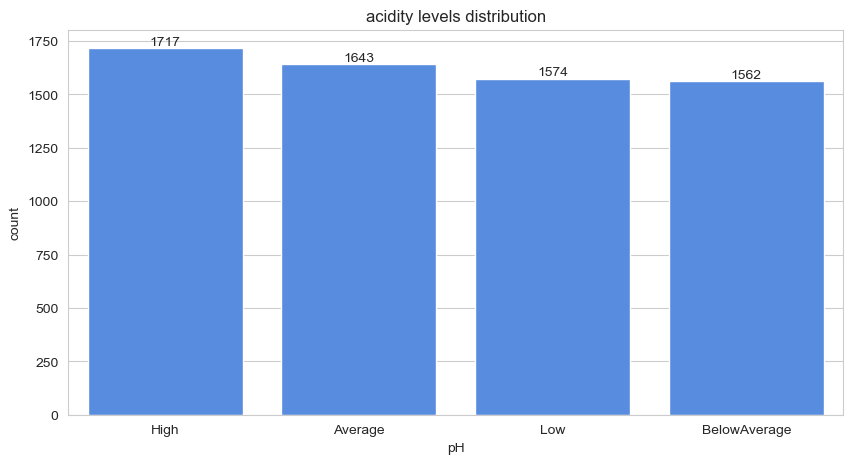

In [57]:
# plotting acidity dist
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "pH", data = wine_df, color = '#4287f5',
                   order = wine_df['pH'].value_counts().index,)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("acidity levels distribution")
plt.show()

- most of the wine in our dataset has high acidity level

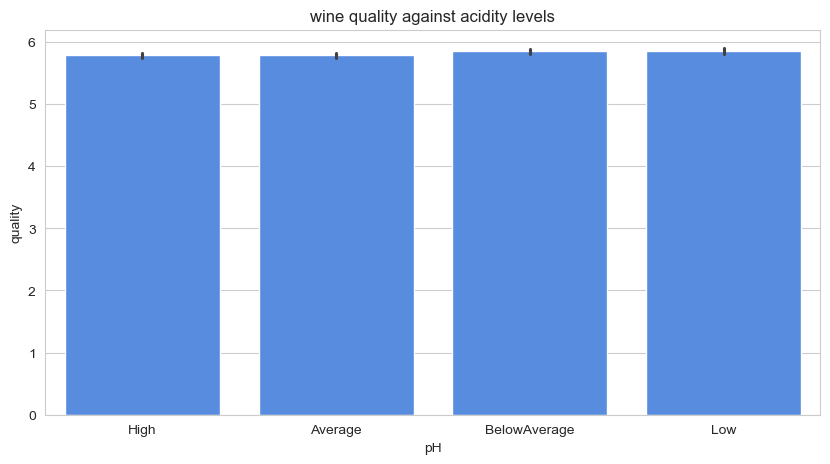

In [58]:
# plotting quality against acidity levels in pH
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(y = "quality", x = "pH", data = wine_df, color = '#4287f5')
plt.title("wine quality against acidity levels")
plt.show()

In [59]:
# Find the mean quality of each acidity level in pH with groupby
wine_df.groupby('pH')['quality'].mean()

/var/folders/hh/1zlly3jj27j032_fwpr2wstm0000gn/T/ipykernel_247/1255036464.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('pH')['quality'].mean()


pH
High            5.783343
Average         5.784540
BelowAverage    5.850832
Low             5.859593
Name: quality, dtype: float64

- it's clear that all four acidity levels has close mean quality, but the Low acidity level has the highest quality in our dataset.

___
## Conclusion

### Q1: What chemical characteristics are most important in predicting the quality of wine?
- the vast majority of the wine has a `quality` of 6, while less numbers has a `quality` of 9.
- using correlation plot, we can easily see if certain attributes are correlated more strongly to wine `quality` than some others.

  - strong correlated attributes:
    - `alcohol` and `quality`, and it's clear that this is the highest relation that affects wine `quality`.
  - weak correlated attributes (do not depend on each other):
    - `density` and `alcohol`.
    - `free.sulphur.dioxide` and `citric.acid` has almost no correlation with quality
  - `density` has strong positive correlation with `residual.sugar` and strong negative correlation with `alcohol`.


### Q2: Is a certain type of wine (red or white) associated with higher quality?
- there is noticable deviation between `white` and `red` wine counts.
- `white` wine formes the vast majority of our dataset as it appears in more than 75% of the times.
- most of the `white` wine has a `quality` of 6, while most of the `red` wine has a `quality` of 5.
- the mean `quality` of `red` and `white` wine are ve`ry close.
- `white` wine has the best mean `quality` higher than `red` wine.


### Q3: Do wines with higher alcoholic content receive better ratings?
- we have the highst `alcohol` content at 14.9.
- most of the wine has `alcoholic` content around 10.4.
- most of our dataset that has a `quality` of 6 appears to have relatively low `acoholic` content, but it's still above the mean.
- high `alcoholic` content only appears in our dataset with high `quality` wine.


### Q4: Do sweeter wines (more residual sugar) receive better ratings?
- we can see that the highest `sugar` content is tied to a `quality` of 5, while lower `sugar` content appears to have respectively higher `quality`.


### Q5: What level of acidity (pH) is associated with the highest quality?
- most of the wine in our dataset has high `acidity level`
- it's clear that all four acidity levels has close mean `quality`, but the `Low acidity` level has the highest `quality` in our dataset.